In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import json
from pprint import pprint
import os
# os.chdir("/home/zhuoyan/nlp/jiajun-icl")
os.chdir("/home/ubuntu/projects/jiajun-icl")

# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

task = "gsm"
model = "llama2_70b"

In [3]:
data = load_json(f"./result/{task}/{model}/accs.json")
print(len(data))

32


In [4]:

df_allseeds = pd.DataFrame(data)
df_allseeds.head(0)

,model,task,n_exmaple,template,setting,mask_head,random_mask_head,random_mask_head_seed,acc,topkacc


In [7]:
df_allseeds.head()

,model,task,n_exmaple,template,setting,mask_head,random_mask_head,random_mask_head_seed,acc,topkacc
0,llama2_70b,gsm,10,4,None,0,False,42,0.59,Question: Four people in a law firm are planni...
1,llama2_70b,gsm,10,4,None,0,True,42,0.59,Question: Four people in a law firm are planni...
2,llama2_70b,gsm,10,4,None,50,False,42,0.41,Question: Four people in a law firm are planni...
3,llama2_70b,gsm,10,4,None,50,True,37,0.57,Question: Four people in a law firm are planni...
4,llama2_70b,gsm,10,4,None,50,True,42,0.52,Question: Four people in a law firm are planni...


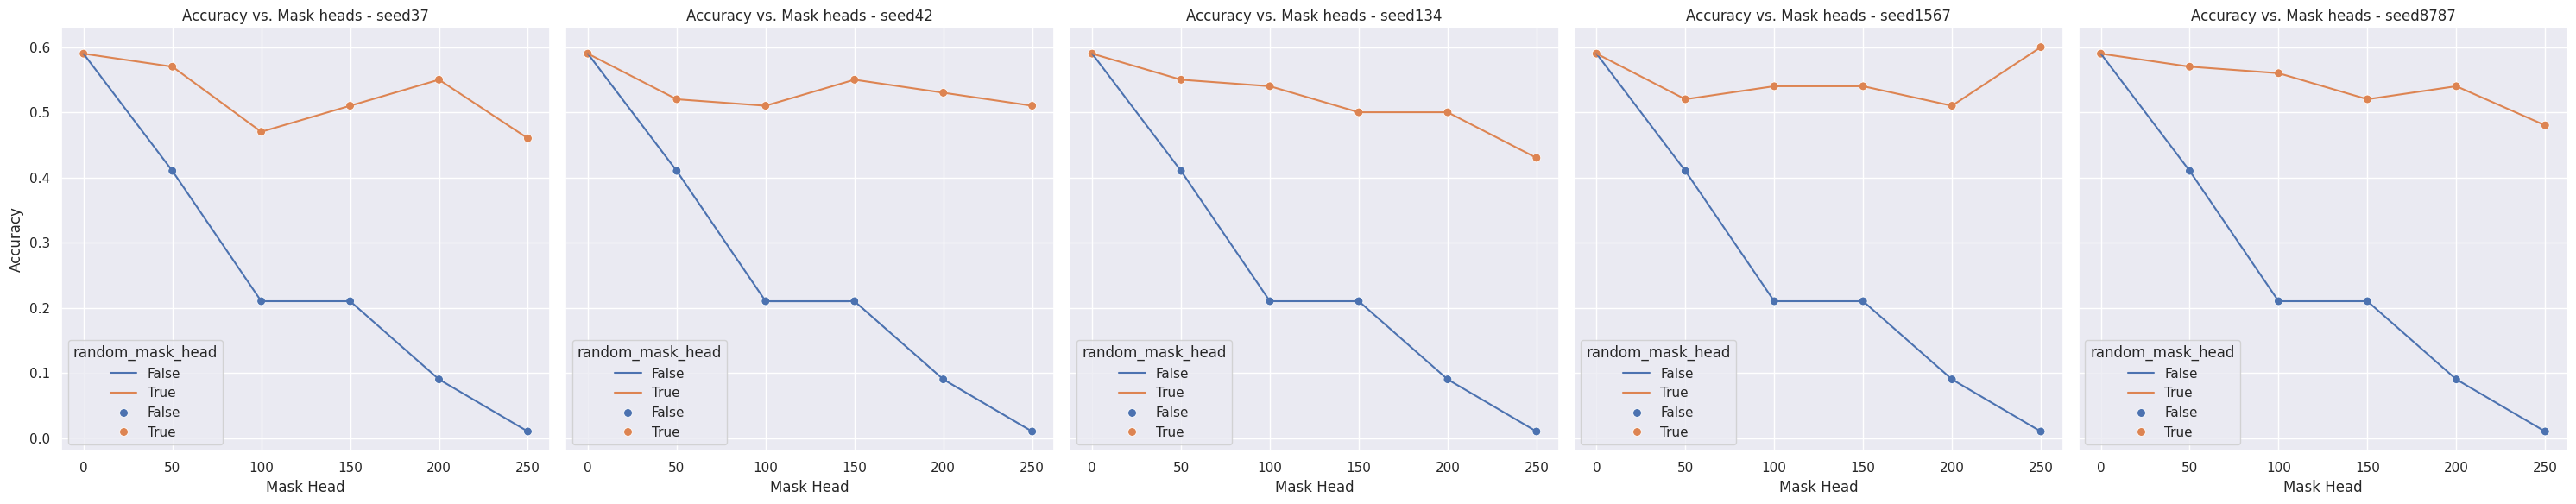

In [8]:

# Select rows where random_mask_head is False
df_not_random_mask_head = df_allseeds[(df_allseeds['random_mask_head'] == False) | (df_allseeds['mask_head'] == 0)]
df_not_random_mask_head.head(0)
sns.set_theme(style="darkgrid")
# Create a figure and subplots
fig, axes = plt.subplots(1, 5, figsize=(30, 6), sharey=True)

for i, seed in enumerate([37,42,134,1567,8787]):
    df_seed = df_allseeds[df_allseeds['random_mask_head_seed'] == seed]
    data = pd.concat([df_not_random_mask_head, df_seed])
    sns.lineplot(data=data, x='mask_head', y='acc', hue='random_mask_head', ax=axes[i])
    sns.scatterplot(data=data, x='mask_head', y='acc', hue='random_mask_head', ax=axes[i], marker='o', s=50)
    axes[i].set_title(f'Accuracy vs. Mask heads - seed{seed}')
    axes[i].set_xlabel('Mask Head')
    axes[i].set_ylabel('Accuracy')


plt.tight_layout()
plt.show()